## TODOs
- TODO: Change prep code to allow different outcome variables
- TODO: Change analyze code for binary outcomes

In [1]:
import analyze
import prep
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%load_ext rpy2.ipython

%load_ext autoreload
%autoreload 2

In [2]:
DATA_PATH = "../data/2020/survey_results_public.csv"
data_raw = pd.read_csv(DATA_PATH)

In [3]:
outcome = "Wage"

In [59]:
data_raw["JobSat"].value_counts()

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [6]:
data_raw["JobSat"] = data_raw["JobSat"].str.contains("y satisfied").astype(float)

In [21]:
data, keep, groups, categorical, numeric, base = prep.prep(data_raw, outcome)

Removing 65 respondents with missing Wage
6008 developers left in the sample after cleaning
139 or 2.3% black developers in the sample with multiracial replacement


In [23]:
X, Y = prep.design_matrix(data, categorical, numeric, base, outcome)

Design matrix complete with 203 variables/columns


In [25]:
D = "EdLevel"

In [26]:
results = analyze.analyze(Y, X, D)

In [19]:
results

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_ols,se_ols,t_ols,p_ols,lower_ols,upper_ols
Ethnicity_Black_or_of_African_descent,-0.049730,0.033818,-1.470524,0.141420,-0.116013,0.016552,-0.092059,0.041442,-2.221405,0.026361,-0.173300,-0.010818
Ethnicity_East_Asian,0.091253,0.033443,2.728627,0.006360,0.025706,0.156800,0.033781,0.040875,0.826452,0.408580,-0.046349,0.113911
Ethnicity_Hispanic_or_Latino_a_x,-0.012791,0.029721,-0.430366,0.666929,-0.071044,0.045462,-0.082354,0.036475,-2.257805,0.023994,-0.153859,-0.010849
Ethnicity_Indigenous_such_as_Native_American_Pacific_Islander_or_Indigenous_Australian,-0.178365,0.159987,-1.114875,0.264904,-0.491934,0.135203,-0.115990,0.196684,-0.589727,0.555396,-0.501561,0.269581
Ethnicity_Middle_Eastern,-0.046855,0.058793,-0.796950,0.425480,-0.162088,0.068377,-0.036706,0.072118,-0.508976,0.610788,-0.178084,0.104671
Ethnicity_Multiracial,0.024612,0.020883,1.178536,0.238583,-0.016319,0.065543,-0.022650,0.025623,-0.883963,0.376752,-0.072881,0.027581
Ethnicity_South_Asian,0.052502,0.032207,1.630154,0.103069,-0.010622,0.115626,0.056929,0.038711,1.470611,0.141449,-0.018959,0.132816
Ethnicity_Southeast_Asian,-0.011105,0.045974,-0.241552,0.809128,-0.101212,0.079002,0.004249,0.056412,0.075320,0.939963,-0.106338,0.114836
Ethnicity_no_answer,-0.048054,0.029146,-1.648740,0.099201,-0.105178,0.009071,-0.031846,0.033436,-0.952427,0.340919,-0.097392,0.033701


In [27]:
results

,coef_ds,se_ds,t_ds,p_ds,lower_ds,upper_ds,coef_ols,se_ols,t_ols,p_ols,lower_ols,upper_ols
EdLevel_Associate_degree_AA_AS_etc,-0.104493,0.024287,-4.302441,0.000017,-0.152094,-0.056892,-0.206410,0.028779,-7.172331,8.262373e-13,-0.262827,-0.149994
EdLevel_Masters_degree_MA_MS_MEng_MBA_etc,0.057933,0.014295,4.052718,0.000051,0.029916,0.085951,0.129264,0.016593,7.790220,7.829710e-15,0.096736,0.161793
EdLevel_Other_doctoral_degree_PhD_EdD_etc,0.167390,0.036432,4.594611,0.000004,0.095985,0.238796,0.243421,0.039661,6.137470,8.920611e-10,0.165670,0.321171
EdLevel_Professional_degree_JD_MD_etc,0.127178,0.077130,1.648880,0.099172,-0.023994,0.278350,0.215747,0.093367,2.310753,2.088022e-02,0.032715,0.398779
EdLevel_Some_college_university_study_without_earning_a_degree,-0.019577,0.016831,-1.163178,0.244757,-0.052564,0.013410,-0.005204,0.019557,-0.266102,7.901695e-01,-0.043543,0.033135
EdLevel_no_answer,-0.161583,0.068609,-2.355131,0.018516,-0.296054,-0.027112,-0.270564,0.082955,-3.261582,1.114117e-03,-0.433186,-0.107943
EdLevel_no_college,-0.025962,0.044376,-0.585054,0.558511,-0.112937,0.061012,-0.119152,0.037991,-3.136324,1.719075e-03,-0.193628,-0.044676


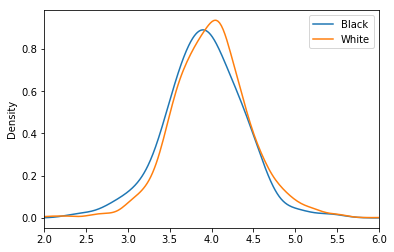

In [57]:
data[data["Ethnicity"].str.contains("Black")].Wage.plot.kde()
data[data["Ethnicity"].str.contains("White")].Wage.plot.kde()
plt.xlim(2,6)
plt.legend(["Black", "White"])
plt.show()

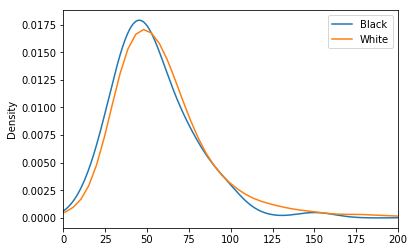

In [58]:
np.exp(data[data["Ethnicity"].str.contains("Black")].Wage).plot.kde()
np.exp(data[data["Ethnicity"].str.contains("White")].Wage).plot.kde()
plt.xlim(0,200)
plt.legend(["Black", "White"])
plt.show()

In [70]:
print(data[data["Ethnicity"].str.contains("Black")].Wage.mean() - data[data["Ethnicity"].str.contains("White")].Wage.mean())
print(np.exp(data[data["Ethnicity"].str.contains("Black")].Wage.mean() - data[data["Ethnicity"].str.contains("White")].Wage.mean()) - 1)

-0.07808540370272388
-0.07511456547022222


In [ ]:
# %%
data[data["Gender_Woman"]].Wage.plot.kde()
data[~data["Gender_Woman"]].Wage.plot.kde()
plt.xlim(2,6)
plt.legend(["Women", "Men"])
plt.show()

In [ ]:
np.exp(data[data["Gender_Woman"]].Wage).plot.kde()
np.exp(data[~data["Gender_Woman"]].Wage).plot.kde()
plt.xlim(0,200)
plt.legend(["Women", "Men"])
plt.show()

In [ ]:
print(data[data["Gender_Woman"]].Wage.mean() - data[~data["Gender_Woman"]].Wage.mean())
print(np.exp(data[data["Gender_Woman"]].Wage.mean() - data[~data["Gender_Woman"]].Wage.mean()) - 1)

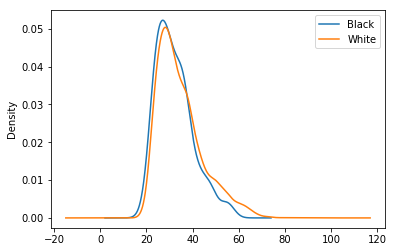

In [31]:
data[data["Ethnicity"].str.contains("Black")].Age.plot.kde()
data[data["Ethnicity"].str.contains("White")].Age.plot.kde()
plt.legend(["Black", "White"])
plt.show()